# Correlação da carteira

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

### Carteira de ações

In [2]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'FLRY3.SA', 
           'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA',
           'AMZN', 'M', 'LB', 'IAU',
           '^BVSP', '^GSPC', '^IXIC', '^DJI']

### Calculando a variação diária de cada ação da carteira

In [3]:
prices = pd.DataFrame()

for b in tickers:
    prices[b] = prices[b] = web.DataReader(b, ds_yahoo, start, end)['Adj Close']

log_returns = np.log(prices / prices.shift(1))
correlacao = log_returns.corr()

### Mapa de calor

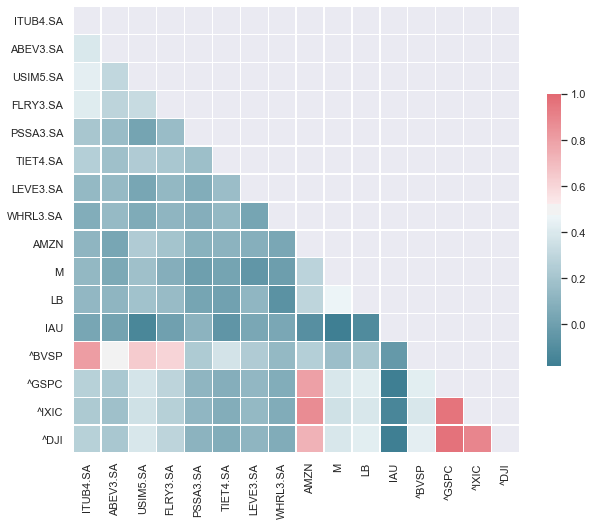

In [4]:
sns.set()

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Tabela de correlação

In [5]:
correlacao

,ITUB4.SA,ABEV3.SA,USIM5.SA,FLRY3.SA,PSSA3.SA,TIET4.SA,LEVE3.SA,WHRL3.SA,AMZN,M,LB,IAU,^BVSP,^GSPC,^IXIC,^DJI
ITUB4.SA,1.000000,0.392102,0.436702,0.418099,0.211906,0.260815,0.144729,0.075424,0.120595,0.137041,0.133845,0.035800,0.807676,0.271432,0.232997,0.269841
ABEV3.SA,0.392102,1.000000,0.305371,0.291936,0.157086,0.181370,0.147872,0.150670,0.037862,0.055220,0.124568,0.021575,0.478597,0.223715,0.180321,0.219386
USIM5.SA,0.436702,0.305371,1.000000,0.330997,0.024743,0.242811,0.039222,0.063265,0.243179,0.182658,0.190640,-0.132759,0.636867,0.376083,0.358523,0.389703
FLRY3.SA,0.418099,0.291936,0.330997,1.000000,0.158578,0.216948,0.137779,0.122030,0.199867,0.086456,0.152968,0.007990,0.606724,0.286520,0.264253,0.292303
PSSA3.SA,0.211906,0.157086,0.024743,0.158578,1.000000,0.172101,0.078035,0.086924,0.097842,0.000014,0.028247,0.108463,0.239552,0.121737,0.125974,0.113737
TIET4.SA,0.260815,0.181370,0.242811,0.216948,0.172101,1.000000,0.165639,0.146983,0.107017,0.026363,0.013147,-0.054048,0.372748,0.083785,0.080562,0.073344
LEVE3.SA,0.144729,0.147872,0.039222,0.137779,0.078035,0.165639,1.000000,0.029943,0.090698,-0.050070,0.126601,0.043130,0.244139,0.130691,0.147614,0.122126
WHRL3.SA,0.075424,0.150670,0.063265,0.122030,0.086924,0.146983,0.029943,1.000000,0.042676,-0.006139,-0.070496,0.043986,0.147549,0.075352,0.065576,0.066511
AMZN,0.120595,0.037862,0.243179,0.199867,0.097842,0.107017,0.090698,0.042676,1.000000,0.281486,0.299438,-0.083620,0.261438,0.801567,0.874410,0.736677
M,0.137041,0.055220,0.182658,0.086456,0.000014,0.026363,-0.050070,-0.006139,0.281486,1.000000,0.465042,-0.174204,0.169613,0.388682,0.356530,0.390666
